In [1]:
#import basic libraries
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

In [2]:
#open the fits file
test=fits.open('test.fits')
test.info()

Filename: test.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     269   (256, 256)   float32   


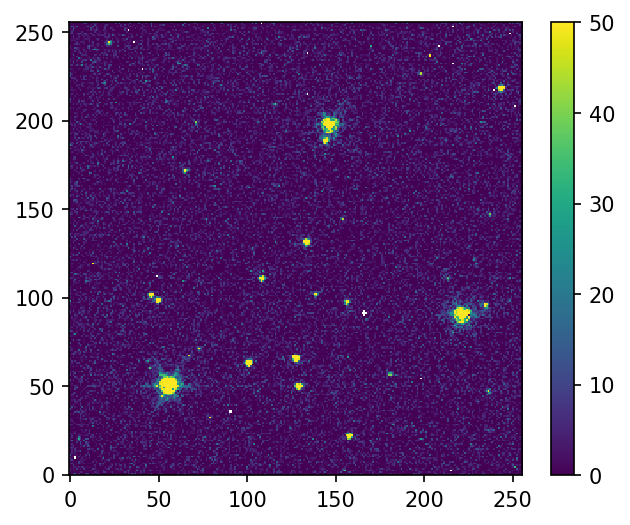

In [3]:
#show the whole image
image=test[0].data
plt.figure(figsize=(5,4),dpi=150)
plt.imshow(image,origin='lower',vmin=0,vmax=50)
plt.colorbar()

In [4]:
#import photutils-related libraries
from astropy.stats import sigma_clipped_stats
from astropy.stats import SigmaClip
from photutils import SExtractorBackground
from photutils import CircularAperture
from photutils import DAOStarFinder
from photutils import CircularAperture

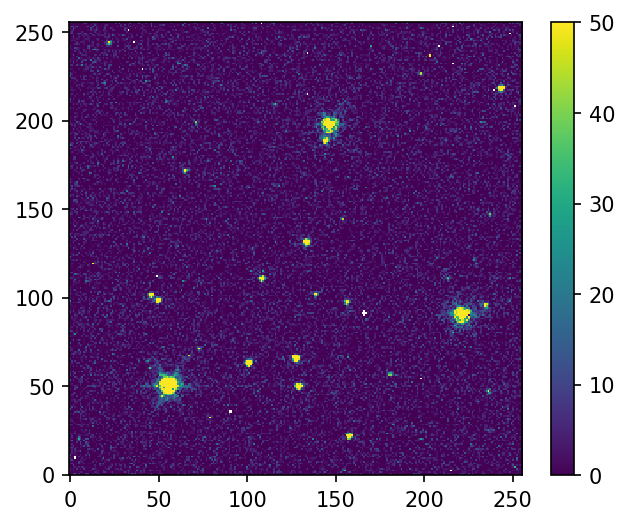

In [5]:
#background subtraction
bkg=SExtractorBackground(SigmaClip(sigma=3.0))
bkg_value=bkg.calc_background(image)
mean,median,std=sigma_clipped_stats(image,sigma=3.0)
image_no_bkg=image-median
fig=plt.figure(figsize=(5,4),dpi=150)
plt.imshow(image_no_bkg,origin='lower',vmin=0,vmax=50)
plt.colorbar()

Centroid of Brightest Star:  [55.56465577 50.16722394]


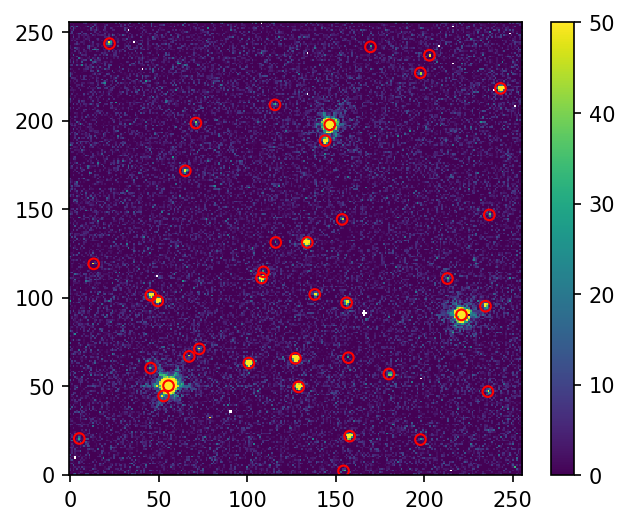

In [6]:
#find stars
#measure their position & flux
daofind=DAOStarFinder(fwhm=1.2,threshold=5*std,exclude_border=True) #guess a proper fwhm for spitzer
sources=daofind(image_no_bkg)
positions=np.transpose((sources['xcentroid'],sources['ycentroid']))
apertures=CircularAperture(positions,r=3.)
fig=plt.figure(figsize=(5,4),dpi=150)
plt.imshow(image_no_bkg,origin='lower',vmin=0,vmax=50)
apertures.plot(color='r',lw=1)
plt.colorbar()
brightest_xy=positions[sources['flux']==np.max(sources['flux'])][0]
xb=int(brightest_xy[0])
yb=int(brightest_xy[1])
print('Centroid of Brightest Star: ',brightest_xy)

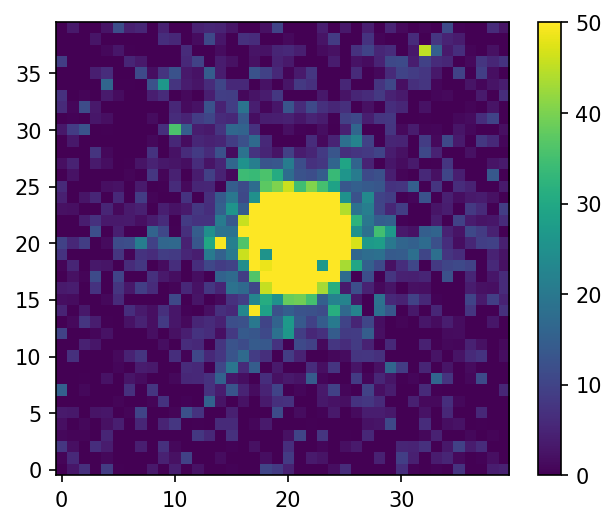

In [7]:
#cut the region and show the brightest star
image_cut=image[yb-20:yb+20,xb-20:xb+20]
fig=plt.figure(figsize=(5,4),dpi=150)
plt.imshow(image_cut,origin='lower',vmin=0, vmax=50)
plt.colorbar()

In [8]:
#save the cut region as test2.fits
test2=fits.PrimaryHDU(image_cut)
test2.writeto('test2.fits',overwrite=True)